<a href="https://colab.research.google.com/github/Shk-aftab/AI/blob/master/cel_to_fra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 39kB/s 
     |████████████████████████████████| 450kB 60.9MB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

In [0]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
temp_df=pd.read_csv('/content/drive/My Drive/data set/Celsius-to-Fahrenheit.csv')

In [0]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [0]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [0]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


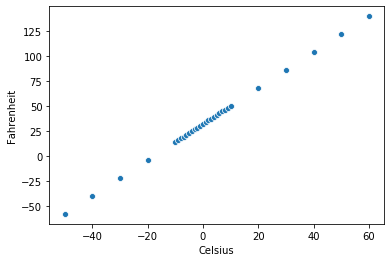

In [0]:
sns.scatterplot(temp_df['Celsius'],temp_df['Fahrenheit'])

In [0]:
x_train=temp_df['Celsius']
y_train=temp_df['Fahrenheit']

In [0]:
x_train.shape


(30,)

In [0]:
y_train.shape

(30,)

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(1),loss='mean_squared_error')

In [0]:
epochs_hist=model.fit(x_train,y_train,epochs=500)

Train on 30 samples
Epoch 1/500
30/30 [==============================] - 0s 879us/sample - loss: 2336.5188
Epoch 2/500
30/30 [==============================] - 0s 119us/sample - loss: 1142.8555
Epoch 3/500
30/30 [==============================] - 0s 61us/sample - loss: 933.3229
Epoch 4/500
30/30 [==============================] - 0s 43us/sample - loss: 1210.9492
Epoch 5/500
30/30 [==============================] - 0s 37us/sample - loss: 1318.2791
Epoch 6/500
30/30 [==============================] - 0s 40us/sample - loss: 1140.1232
Epoch 7/500
30/30 [==============================] - 0s 51us/sample - loss: 860.3700
Epoch 8/500
30/30 [==============================] - 0s 42us/sample - loss: 651.9592
Epoch 9/500
30/30 [==============================] - 0s 48us/sample - loss: 589.5274
Epoch 10/500
30/30 [==============================] - 0s 43us/sample - loss: 636.7243
Epoch 11/500
30/30 [==============================] - 0s 44us/sample - loss: 691.7476
Epoch 12/500
30/30 [================

In [0]:
epochs_hist.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'training loss')

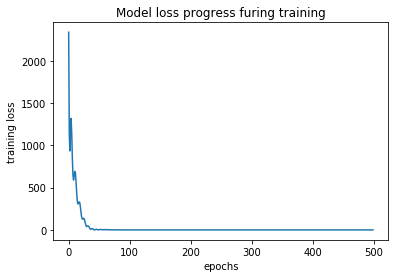

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress furing training')
plt.xlabel('epochs')
plt.ylabel('training loss')

In [0]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [0]:
Temp_c=0
Temp_f=model.predict([Temp_c])
print('Temperature in Degf Using Trained ANN=',Temp_f)

Temperature in Degf Using Trained ANN= [[32.]]


In [0]:
 #lets confirm with the equation 
 Temp_f=9/5*Temp_c+32
 print('Temperature in degf using equation',Temp_f)

Temperature in deg using equation 32.0
